<a href="https://colab.research.google.com/github/jenniferamhajduk/AIML_Playground/blob/main/Custom_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@InProceedings{cimpoi14describing,
	      Author    = {M. Cimpoi and S. Maji and I. Kokkinos and S. Mohamed and and A. Vedaldi},
	      Title     = {Describing Textures in the Wild},
	      Booktitle = {Proceedings of the {IEEE} Conf. on Computer Vision and Pattern Recognition ({CVPR})},
	      Year      = {2014}}

In [1]:
!pip install torchrec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.6/429.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.6/339.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 64.6 MB/s eta 0:00:00


In [55]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
torch.__version__

'2.1.0+cu121'

In [43]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [42]:
BATCH_SIZE=32
EPOCHS=10

In [4]:
!nvidia-smi

Wed Feb 28 04:09:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              23W / 300W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
train_data = datasets.DTD(
    root="data",
    split="train",
    partition=1,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

test_data = datasets.DTD(
    root="data",
    split="test",
    partition=1,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

val_data = datasets.DTD(
    root="data",
    split="val",
    partition=1,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

100%|██████████| 625239812/625239812 [00:21<00:00, 29083286.14it/s]


Extracting data/dtd/dtd-r1.0.1.tar.gz to data/dtd


In [6]:
len(train_data), len(test_data), len(val_data)

(1880, 1880, 1880)

In [7]:
image, target = train_data[0]

In [8]:
image, target

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0039, 0.0039],
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0039],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.0039, 0.0039, 0.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.4902, 0.5020, 0.4902],
          [1.0000, 1.0000, 1.0000,  ..., 0.4784, 0.5020, 0.4824],
          [1.0000, 1.0000, 1.0000,  ...,

In [9]:
image.shape

torch.Size([3, 480, 640])

In [11]:
classes = train_data.classes
classes

['banded',
 'blotchy',
 'braided',
 'bubbly',
 'bumpy',
 'chequered',
 'cobwebbed',
 'cracked',
 'crosshatched',
 'crystalline',
 'dotted',
 'fibrous',
 'flecked',
 'freckled',
 'frilly',
 'gauzy',
 'grid',
 'grooved',
 'honeycombed',
 'interlaced',
 'knitted',
 'lacelike',
 'lined',
 'marbled',
 'matted',
 'meshed',
 'paisley',
 'perforated',
 'pitted',
 'pleated',
 'polka-dotted',
 'porous',
 'potholed',
 'scaly',
 'smeared',
 'spiralled',
 'sprinkled',
 'stained',
 'stratified',
 'striped',
 'studded',
 'swirly',
 'veined',
 'waffled',
 'woven',
 'wrinkled',
 'zigzagged']

In [13]:
len(classes)

47

Text(0.5, 1.0, 'braided')

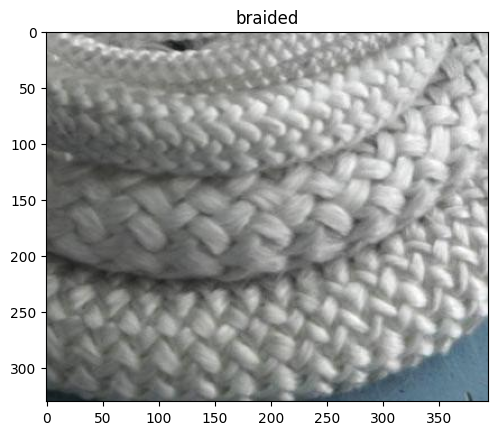

In [31]:
image, label = train_data[100]
image = image.squeeze(dim=1)
image = image.numpy()
image = image.transpose(1,2,0)
plt.imshow(image)
plt.title(classes[label])

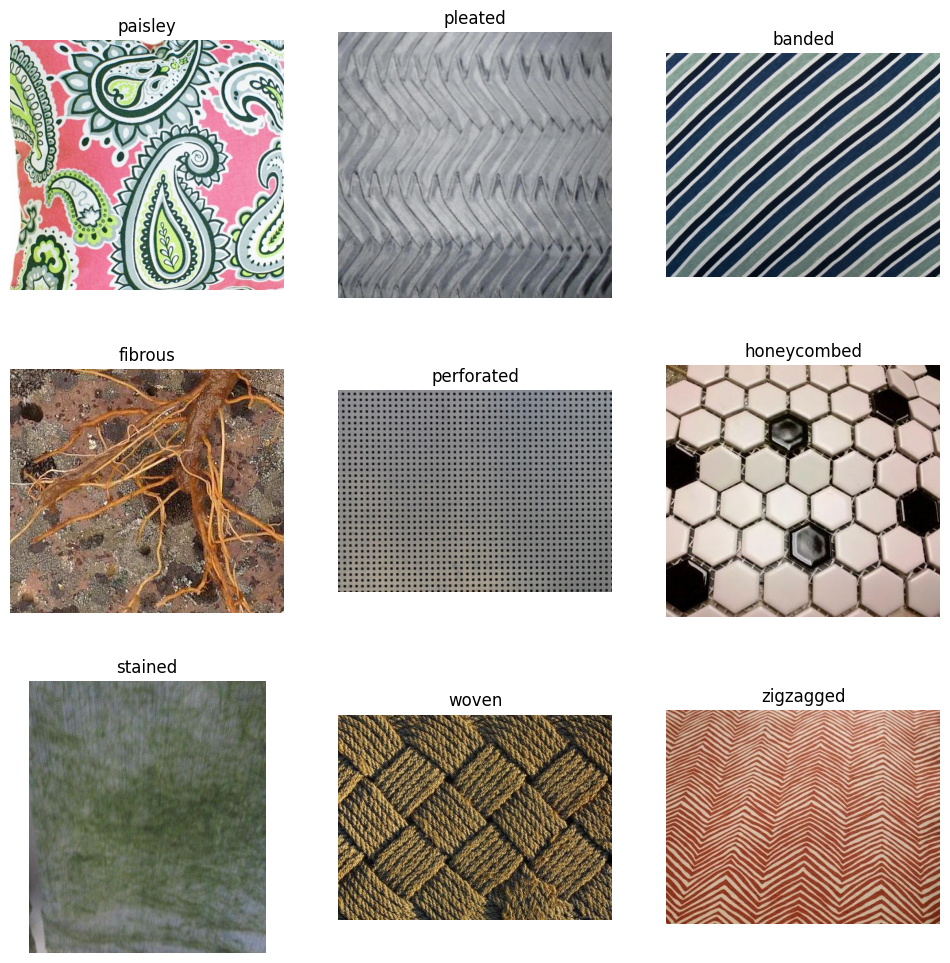

In [40]:
fig = plt.figure(figsize=(12,12))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
  rand_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[rand_idx]
  image = image.numpy()
  image = image.transpose(1,2,0)
  fig.add_subplot(rows, cols, i)
  plt.imshow(image)
  plt.title(classes[label])
  plt.axis(False)

In [61]:
new_image_size = (640,480)
for image, label in train_data:
  image = image.numpy()
  image = image.transpose(1,2,0)
  image = cv2.resize(image, new_image_size)

train_data[399].shape

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


In [46]:
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

val_dataloader = DataLoader(
    dataset=val_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [47]:
train_dataloader, test_dataloader, val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79e4bc7fed40>,
 <torch.utils.data.dataloader.DataLoader at 0x79e4bcaa05b0>)

In [49]:
train_features, train_labels = next(iter(train_dataloader))

RuntimeError: stack expects each tensor to be equal size, but got [3, 480, 480] at entry 0 and [3, 488, 532] at entry 1